## 3. Implementando os Simuladores para o Caso Exponencial

Cenário $\lambda = 1$ e $\mu  = 2$

Descrição: Considere uma fila M/M/1, em que chegadas ocorrem segundo um fluxo Poisson com taxa 1 chegadas/segundo e serviços são tais que cada serviço é distribuído exponencialmente com média 1/2 segundo. Implemente dois simuladores.

In [1]:
%matplotlib ipympl

In [2]:
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [3]:
def simulate1(arrival_rate, service_rate, max_steps=1000):
    total_arrivals = total_departures = total_waiting_time = simulation_time = queue_length = 0
    arrivals_queue = []

    for i in range(max_steps):
        sample_arrival = random.expovariate(arrival_rate)
        sample_departure = random.expovariate(service_rate)

        if queue_length == 0 or sample_arrival < sample_departure:
            # Arrival
            simulation_time += sample_arrival
            total_arrivals += 1
            queue_length += 1
            if queue_length > 1:
                arrivals_queue.append(simulation_time)
        else:
            # Departure
            simulation_time += sample_departure
            total_departures += 1
            queue_length -= 1
            if len(arrivals_queue) > 0:
                total_waiting_time += simulation_time - arrivals_queue.pop(0)

    average_waiting_time = total_waiting_time / total_departures
    average_clients_in_system = total_arrivals / simulation_time

    return {
        "average_waiting_time": average_waiting_time,
        "average_clients_in_system": average_clients_in_system
    }

In [4]:
simulate1(1, 2, 1000)

{'average_waiting_time': 0.49038528023245376,
 'average_clients_in_system': 0.9591293542253724}

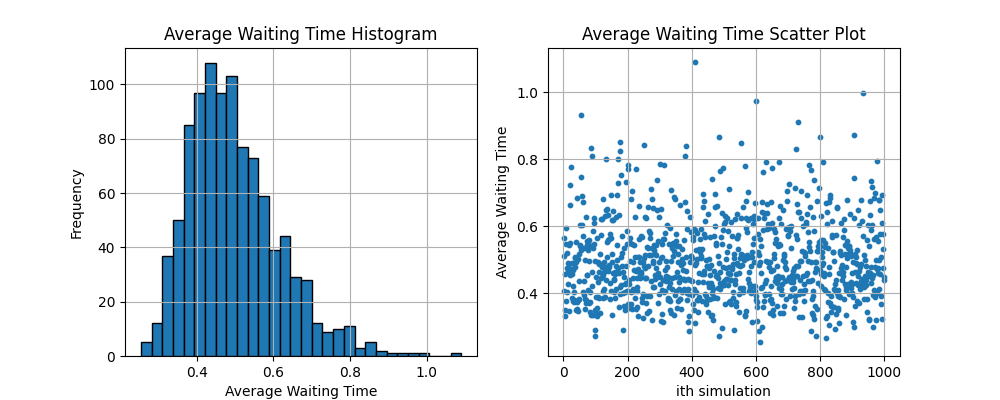

In [13]:
arrival_rate = 1 # lambda
service_rate = 2 # mu
n_simulations = 1000
max_steps = 1000

average_waiting_times = [simulate1(arrival_rate, service_rate, max_steps)["average_waiting_time"] for _ in range(n_simulations)]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plotting
axes[0].hist(average_waiting_times, bins=30, edgecolor='black')
axes[0].set_xlabel('Average Waiting Time')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Average Waiting Time Histogram')

axes[1].scatter(range(1, n_simulations + 1), average_waiting_times, s=10)
axes[1].set_xlabel('ith simulation')
axes[1].set_ylabel('Average Waiting Time')
axes[1].set_title('Average Waiting Time Scatter Plot')

axes[0].grid(True)
axes[1].grid(True)

plt.show()

In [ ]:
def get_confidence_interval(avg_waiting_time):
    n = len(avg_waiting_time)
    mean = np.sum(avg_waiting_time)/n
    s = np.std(avg_waiting_time)
    min = mean - 1.96*s/math.sqrt(n)
    max = mean + 1.96*s/math.sqrt(n)
    return [min,max]